In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Path to logs
log_paths = {
    'Baseline (SGD, Tanh, 0.01)': '../logs/baseline_paper/training_log.csv',
    'SGD High LR (0.1)': '../logs/sgd_high_lr/training_log.csv',
    'Modern (Adam, ReLU, 0.001)': '../logs/modern_adam_relu/training_log.csv'
}

# Loading data
dfs = {}
for name, path in log_paths.items():
    if os.path.exists(path):
        dfs[name] = pd.read_csv(path)
    else:
        print(f"Warning: {path} not found.")

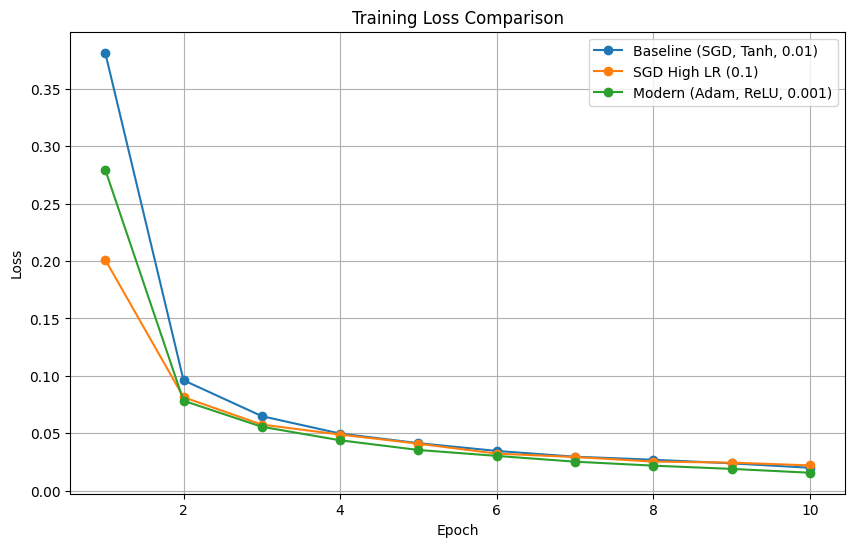

In [2]:
# Ploting Training Loss
plt.figure(figsize=(10, 6))
for name, df in dfs.items():
    plt.plot(df['epoch'], df['train_loss'], label=name, marker='o')

plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

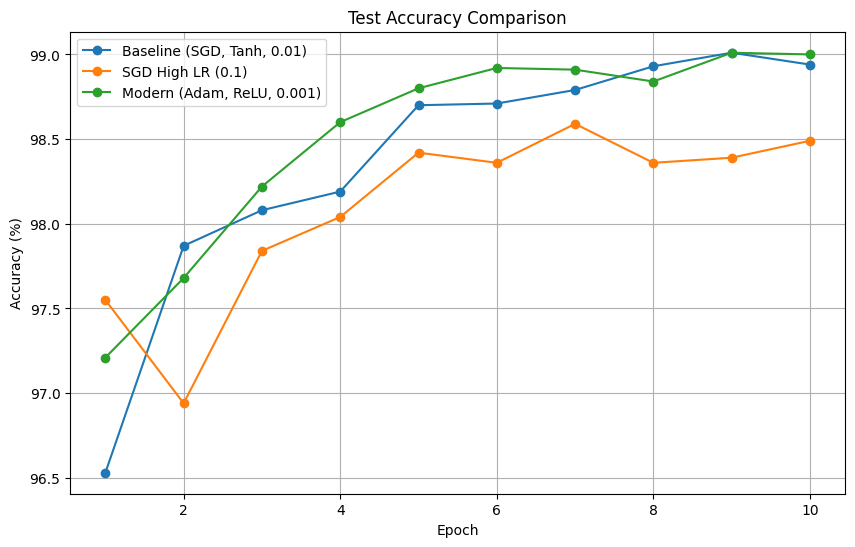

In [3]:
# Plot Test Accuracy
plt.figure(figsize=(10, 6))
for name, df in dfs.items():
    plt.plot(df['epoch'], df['test_accuracy'], label=name, marker='o')

plt.title('Test Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Summary Table
summary = []
for name, df in dfs.items():
    best_acc = df['test_accuracy'].max()
    final_acc = df['test_accuracy'].iloc[-1]
    summary.append({'Experiment': name, 'Best Accuracy': best_acc, 'Final Accuracy': final_acc})

summary_df = pd.DataFrame(summary)
print(summary_df)

                   Experiment  Best Accuracy  Final Accuracy
0  Baseline (SGD, Tanh, 0.01)          99.01           98.94
1           SGD High LR (0.1)          98.59           98.49
2  Modern (Adam, ReLU, 0.001)          99.01           99.00
